In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm 
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14      # rcparams means run comments for styel
matplotlib.rcParams['xtick.labelsize'] = 12     # xticklabels returns the x-axis tick labels for the current axes.
matplotlib.rcParams['ytick.labelsize'] = 12     # yticklabels returns the y-axis tick labels for the current axes.
matplotlib.rcParams['text.color'] = 'k'

In [17]:
df = pd.read_excel("Superstore.xls")    #calling csv file 
furniture = df.loc[df['Category'] == 'Furniture']  #calling the Furniture data from category column
furniture

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
10,11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9962,9963,CA-2015-168088,2015-03-19,2015-03-22,First Class,CM-12655,Corinna Mitchell,Home Office,United States,Houston,...,77041,Central,FUR-BO-10004218,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,383.4656,4,0.32,-67.6704
9964,9965,CA-2016-146374,2016-12-05,2016-12-10,Second Class,HE-14800,Harold Engle,Corporate,United States,Newark,...,19711,East,FUR-FU-10002671,Furniture,Furnishings,Electrix 20W Halogen Replacement Bulb for Zoom...,13.4000,1,0.00,6.4320
9980,9981,US-2015-151435,2015-09-06,2015-09-09,Second Class,SW-20455,Shaun Weien,Consumer,United States,Lafayette,...,70506,South,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,85.9800,1,0.00,22.3548
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028


In [18]:
furniture['Order Date'].min(), furniture['Order Date'].max() # calling minmum and maximum date

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [19]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)
furniture = furniture.sort_values('Order Date') # droping rest of th columns except Order Date ,Sales.
furniture.isnull().sum() # checking for null values



C:\Users\hema\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Order Date    0
Sales         0
dtype: int64

In [20]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index() #   the sum of sales  according to Order  Date
furniture

,Order Date,Sales
0,2014-01-06,2573.8200
1,2014-01-07,76.7280
2,2014-01-10,51.9400
3,2014-01-11,9.9400
4,2014-01-13,879.9390
...,...,...
884,2017-12-24,1393.4940
885,2017-12-25,832.4540
886,2017-12-28,551.2568
887,2017-12-29,2330.7180


In [21]:
furniture = furniture.set_index('Order Date') # setting OrderDate as index
furniture.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

In [22]:
y = furniture['Sales'].resample('M').sum() # resampling the sales from days to months
y

Order Date
2014-01-31     6242.5250
2014-02-28     1839.6580
2014-03-31    14573.9560
2014-04-30     7944.8370
2014-05-31     6912.7870
2014-06-30    13206.1256
2014-07-31    10821.0510
2014-08-31     7320.3465
2014-09-30    23816.4808
2014-10-31    12304.2470
2014-11-30    21564.8727
2014-12-31    30645.9665
2015-01-31    11739.9416
2015-02-28     3134.3740
2015-03-31    12499.7830
2015-04-30    10475.6985
2015-05-31     9374.9505
2015-06-30     7714.1790
2015-07-31    13674.4200
2015-08-31     9638.5922
2015-09-30    26273.0230
2015-10-31    12026.6235
2015-11-30    30880.8325
2015-12-31    23085.8192
2016-01-31     7622.7430
2016-02-29     3925.5510
2016-03-31    12801.0920
2016-04-30    13212.0900
2016-05-31    15119.8350
2016-06-30    13070.5720
2016-07-31    13068.5190
2016-08-31    12483.2323
2016-09-30    27262.8809
2016-10-31    11872.5770
2016-11-30    31783.6288
2016-12-31    36678.7150
2017-01-31     5964.0320
2017-02-28     6866.3374
2017-03-31    10893.4448
2017-04-30    

In [23]:
y['2017':] #showing only 2017 sales 

Order Date
2017-01-31     5964.0320
2017-02-28     6866.3374
2017-03-31    10893.4448
2017-04-30     9065.9581
2017-05-31    16957.5582
2017-06-30    19008.5867
2017-07-31    11813.0220
2017-08-31    15441.8740
2017-09-30    29028.2060
2017-10-31    21884.0682
2017-11-30    37056.7150
2017-12-31    31407.4668
Freq: M, Name: Sales, dtype: float64

In [24]:
x = furniture['Sales'].resample('Q').sum()# resampled Sales from days to Quartrly
x

Order Date
2014-03-31    22656.1390
2014-06-30    28063.7496
2014-09-30    41957.8783
2014-12-31    64515.0862
2015-03-31    27374.0986
2015-06-30    27564.8280
2015-09-30    49586.0352
2015-12-31    65993.2752
2016-03-31    24349.3860
2016-06-30    41402.4970
2016-09-30    52814.6322
2016-12-31    80334.9208
2017-03-31    23723.8142
2017-06-30    45032.1030
2017-09-30    56283.1020
2017-12-31    90348.2500
Freq: Q-DEC, Name: Sales, dtype: float64

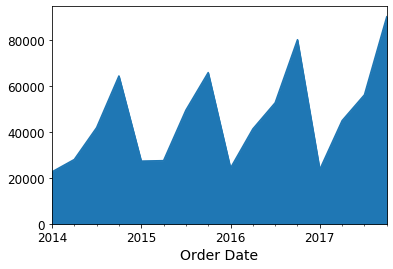

In [11]:
x.plot( kind ='area')

In [12]:
v = furniture['Sales'].resample('Y').sum() # resampled Quantity from days to Years
v

Order Date
2014-12-31    157192.8531
2015-12-31    170518.2370
2016-12-31    198901.4360
2017-12-31    215387.2692
Freq: A-DEC, Name: Sales, dtype: float64

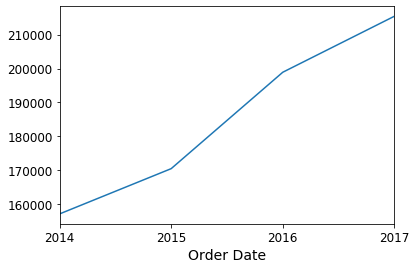

In [13]:
v.plot()

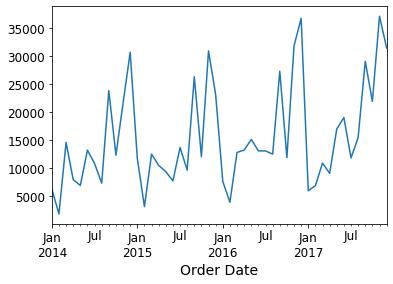

In [14]:
y.plot() #ploting graph for sales according to monthwise
plt.show()

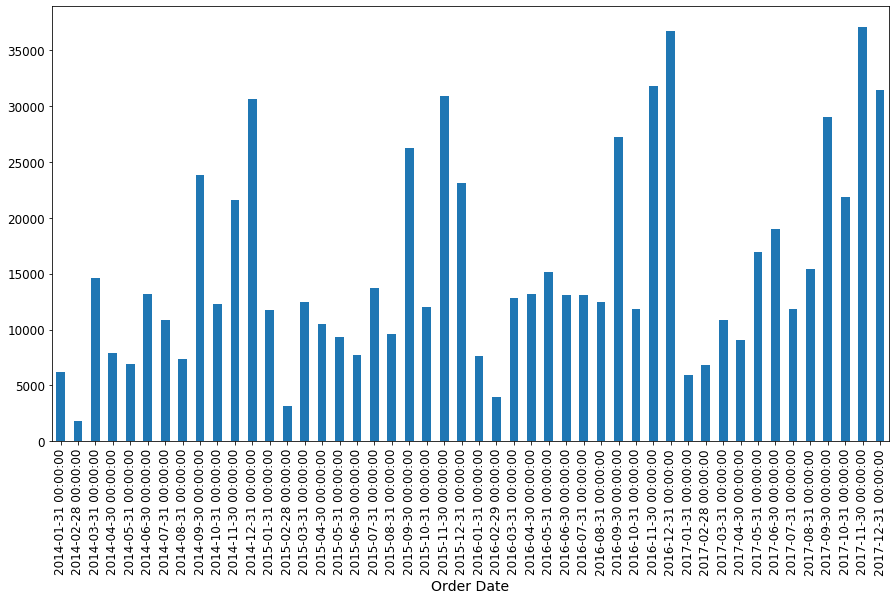

In [15]:
y.plot(kind='bar',figsize=(15,8))  # ploting bar graph according to moth wise

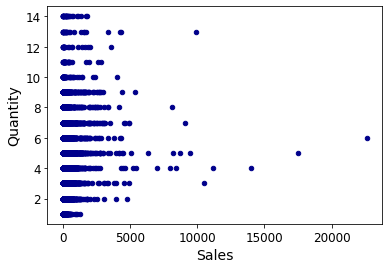

In [16]:
x1 = df.plot.scatter(x='Sales',y='Quantity',c='DarkBlue')

In [17]:
df = pd.read_excel("Superstore.xls")
furnitures = df.loc[df['Category'] == 'Furniture'] 
furnitures

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
10,11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092
23,24,US-2017-156909,2017-07-16,2017-07-18,Second Class,SF-20065,Sandra Flanagan,Consumer,United States,Philadelphia,...,19140,East,FUR-CH-10002774,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.3720,2,0.30,-1.0196
24,25,CA-2015-106320,2015-09-25,2015-09-30,Standard Class,EB-13870,Emily Burns,Consumer,United States,Orem,...,84057,West,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,1044.6300,3,0.00,240.2649
27,28,US-2015-150630,2015-09-17,2015-09-21,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,19140,East,FUR-BO-10004834,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.4300,7,0.50,-1665.0522
29,30,US-2015-150630,2015-09-17,2015-09-21,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,19140,East,FUR-FU-10004848,Furniture,Furnishings,"Howard Miller 13-3/4"" Diameter Brushed Chrome ...",124.2000,3,0.20,15.5250
36,37,CA-2016-117590,2016-12-08,2016-12-10,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,...,75080,Central,FUR-FU-10003664,Furniture,Furnishings,"Electrix Architect's Clamp-On Swing Arm Lamp, ...",190.9200,5,0.60,-147.9630


In [18]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Sales', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Postal Code', 'Discount', 'Profit']
furnitures.drop(cols, axis=1, inplace=True)

furnitures = furnitures.sort_values('Order Date') #now droping rest of the columns except Quantity and Order date
furnitures.isnull().sum()

C:\Users\girik\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Order Date    0
Quantity      0
dtype: int64

In [19]:
furnitures

,Order Date,Quantity
7474,2014-01-06,9
7660,2014-01-07,3
866,2014-01-10,1
716,2014-01-11,2
2978,2014-01-13,6
4938,2014-01-13,3
6474,2014-01-14,4
970,2014-01-16,6
5465,2014-01-19,5
6327,2014-01-20,3


In [20]:
furnitures = furnitures.groupby('Order Date')['Quantity'].sum().reset_index() # here we are adding Quantity in the base of order date
furnitures

,Order Date,Quantity
0,2014-01-06,9
1,2014-01-07,3
2,2014-01-10,1
3,2014-01-11,2
4,2014-01-13,9
5,2014-01-14,4
6,2014-01-16,6
7,2014-01-19,5
8,2014-01-20,15
9,2014-01-21,3


In [21]:
furnitures = furnitures.set_index('Order Date')
furnitures

,Quantity
Order Date,
2014-01-06,9
2014-01-07,3
2014-01-10,1
2014-01-11,2
2014-01-13,9
2014-01-14,4
2014-01-16,6
2014-01-19,5
2014-01-20,15


In [22]:
z = furnitures['Quantity'].resample('M').sum() # resampled Quantity from days to months
z

Order Date
2014-01-31     70
2014-02-28     23
2014-03-31    131
2014-04-30     81
2014-05-31     97
2014-06-30    122
2014-07-31    114
2014-08-31    107
2014-09-30    208
2014-10-31    130
2014-11-30    228
2014-12-31    312
2015-01-31     88
2015-02-28     45
2015-03-31    111
2015-04-30    107
2015-05-31    126
2015-06-30    112
2015-07-31    162
2015-08-31    112
2015-09-30    205
2015-10-31    140
2015-11-30    310
2015-12-31    257
2016-01-31    101
2016-02-29     69
2016-03-31    162
2016-04-30    146
2016-05-31    181
2016-06-30    128
2016-07-31    159
2016-08-31    115
2016-09-30    284
2016-10-31    187
2016-11-30    318
2016-12-31    343
2017-01-31     86
2017-02-28     71
2017-03-31    123
2017-04-30    175
2017-05-31    184
2017-06-30    176
2017-07-31    183
2017-08-31    127
2017-09-30    302
2017-10-31    252
2017-11-30    364
2017-12-31    394
Freq: M, Name: Quantity, dtype: int64

In [23]:
h = furnitures['Quantity'].resample('Q').sum() # resampled Quantity from days to months
h

Order Date
2014-03-31     224
2014-06-30     300
2014-09-30     429
2014-12-31     670
2015-03-31     244
2015-06-30     345
2015-09-30     479
2015-12-31     707
2016-03-31     332
2016-06-30     455
2016-09-30     558
2016-12-31     848
2017-03-31     280
2017-06-30     535
2017-09-30     612
2017-12-31    1010
Freq: Q-DEC, Name: Quantity, dtype: int64

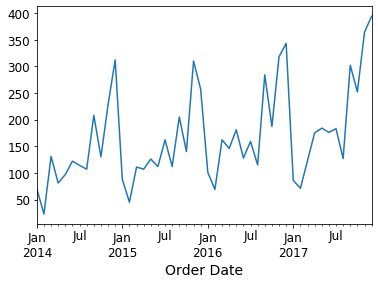

In [24]:
z.plot()

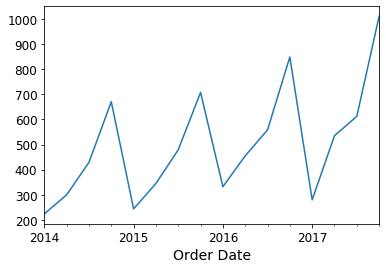

In [25]:
h.plot()

In [26]:
d = furnitures['Quantity'].resample('Y').sum() # resampled Quantity from days to months
d

Order Date
2014-12-31    1623
2015-12-31    1775
2016-12-31    2193
2017-12-31    2437
Freq: A-DEC, Name: Quantity, dtype: int64

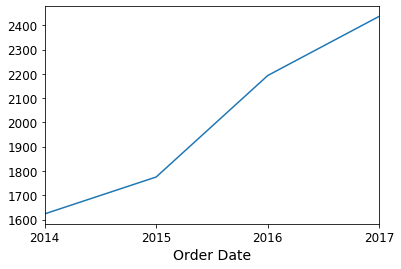

In [27]:
d.plot()

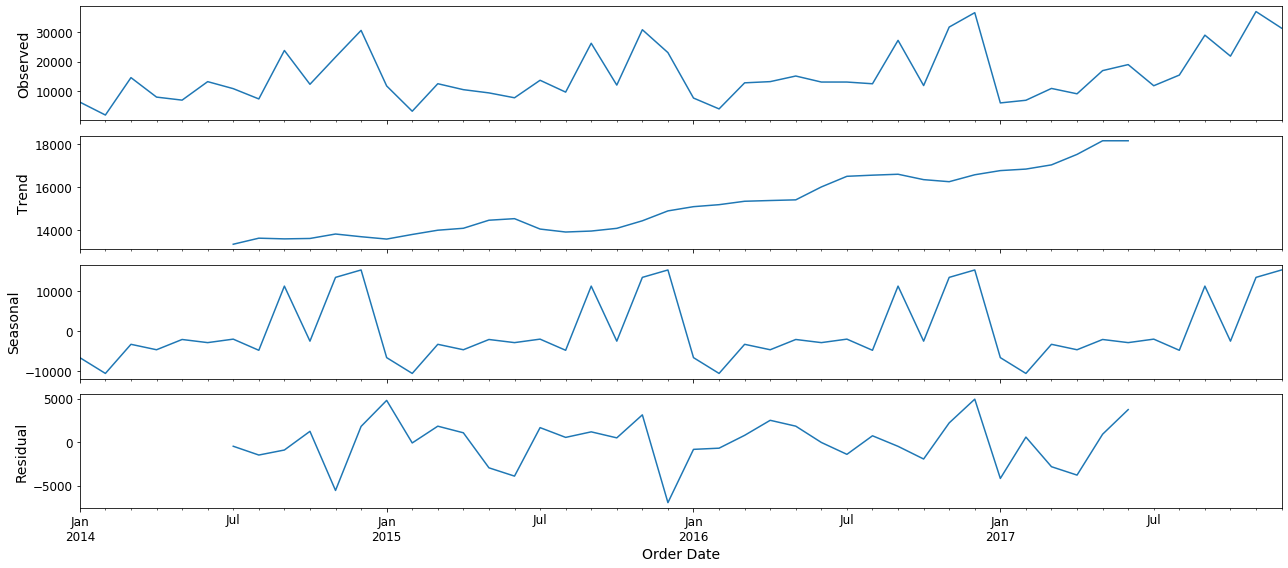

In [28]:
from pylab import rcParams  
rcParams['figure.figsize'] = 18, 8           #function in a stats model is seasonal_decompostion
decomposition = sm.tsa.seasonal_decompose(y, model='additive')# additive  model suggests that components are added together.
fig = decomposition.plot()
plt.show()

In [29]:
df1= pd.read_excel("Superstore.xls")
#furnitures = df.loc[df['Category'] == 'Furniture'] 
#furnitures
df1

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
6,7,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800,4,0.00,1.9656
7,8,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,6,0.20,90.7152
8,9,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040,3,0.20,5.7825
9,10,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000,5,0.00,34.4700


In [30]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Order Date', 'Region', 'Product ID',  'Sub-Category', 'Product Name', 'Postal Code', 'Discount', 'Profit','Quantity']
df1.drop(cols, axis=1, inplace=True)
get=df1.groupby("Category").count()
get
 

,Sales
Category,
Furniture,2121
Office Supplies,6026
Technology,1847


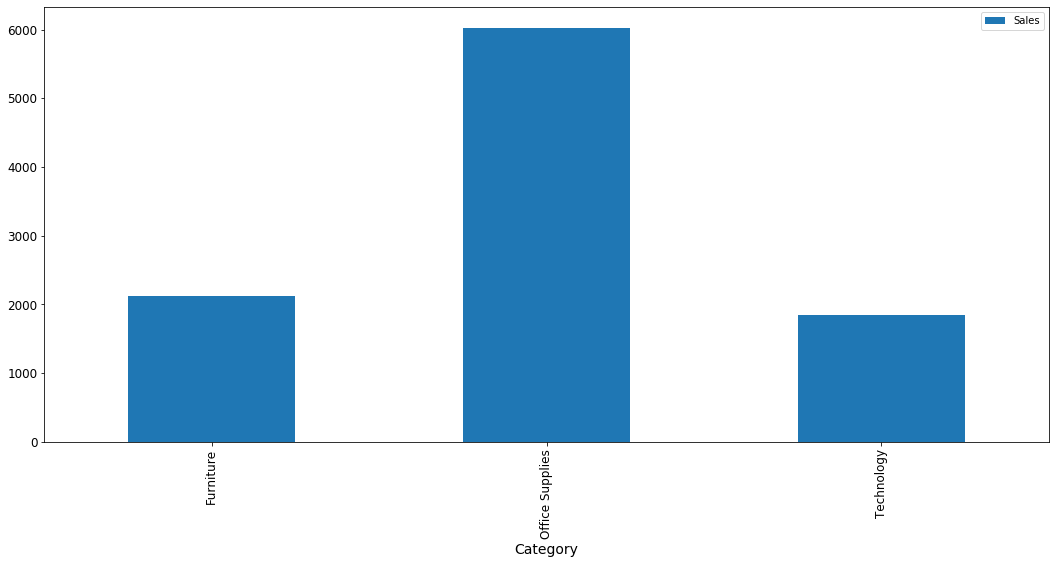

In [31]:
get.plot( kind ='bar')

In [32]:
df2= pd.read_excel("Superstore.xls")
df2

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
6,7,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800,4,0.00,1.9656
7,8,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,6,0.20,90.7152
8,9,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040,3,0.20,5.7825
9,10,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000,5,0.00,34.4700


In [33]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Order Date', 'Region', 'Product ID',  'Category', 'Product Name', 'Postal Code', 'Discount', 'Profit','Quantity']
df2.drop(cols, axis=1, inplace=True)
subcaty=df2.groupby("Sub-Category").count()
subcaty
 

,Sales
Sub-Category,
Accessories,775
Appliances,466
Art,796
Binders,1523
Bookcases,228
Chairs,617
Copiers,68
Envelopes,254
Fasteners,217


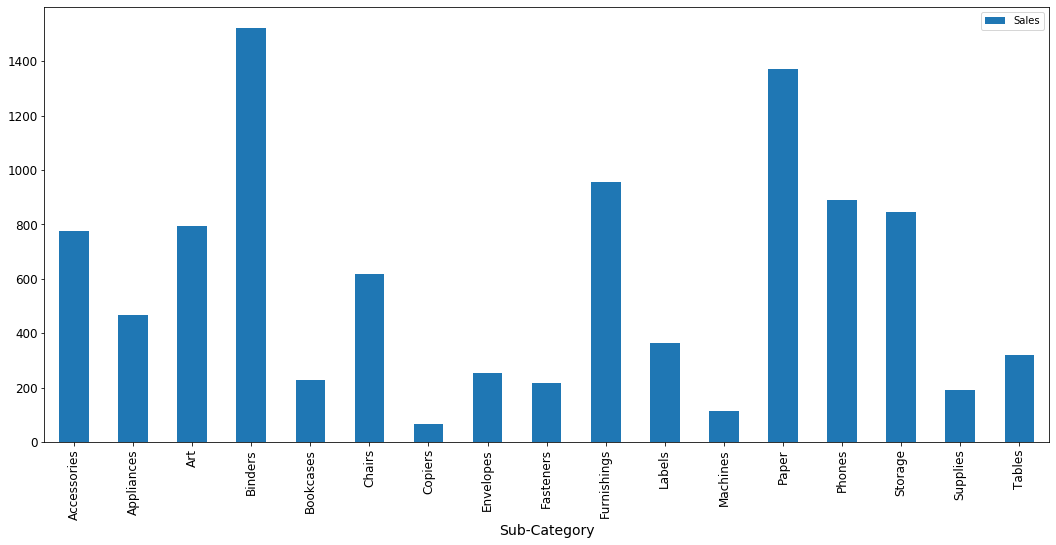

In [34]:
subcaty.plot(kind = 'bar')